# K-Means Clustering
---

In [8]:
function idx = findClosestCentroids(X, centroids)
K = size(centroids, 1);
idx = zeros(size(X,1), 1);
value=zeros(K,1);
for i=1:size(X,1)
	for j=1:K
		value(j)=sum((X(i,:)-centroids(j,:)) .^ 2);
	end;
	[val,ind]=min(value);
	idx(i)=ind;
end;
end

In [9]:
function centroids = computeCentroids(X, idx, K)
[m n] = size(X);
centroids = zeros(K, n);
for i=1:K
	temp=find(idx==i);
	centroids(i,:)=sum(X(temp,:))/size(X(temp,:),1);
end;
end

In [10]:
function [centroids, idx] = runkMeans(X, initial_centroids, max_iters, plot_progress)
%% Runs the K-Means algorithm on data matrix X, where each row of X is a single example
if ~exist('plot_progress', 'var') || isempty(plot_progress)
	plot_progress = false; % Set default value for plot progress
end;
if plot_progress % Plot the data if we are plotting progress
	figure;
	hold on;
end;
[m n] = size(X); % Initialize values
K = size(initial_centroids, 1);
centroids = initial_centroids;
previous_centroids = centroids;
idx = zeros(m, 1);
for i=1:max_iters % Run K-Means
	if exist('OCTAVE_VERSION')
		fflush(stdout);
	end;
	idx = findClosestCentroids(X, centroids); % For each example in X, assign it to the closest centroid
	if plot_progress % Optionally, plot progress here
		plotProgresskMeans(X, centroids, previous_centroids, idx, K, i);
		previous_centroids = centroids;
	end;
	centroids = computeCentroids(X, idx, K); % Given the memberships, compute new centroids
	fprintf(['K-Means iteration %d/%d\t','%s \n'], i, max_iters, mat2str(centroids, [5 5]));
end;
if plot_progress % Hold off if we are plotting progress
	hold off;
end;
end

In [11]:
function centroids = kMeansInitCentroids(X, K)
%% This function initializes K centroids that are to be used in K-Means on the dataset X
centroids = zeros(K, size(X, 2));
% ou should set centroids to randomly chosen examples from the dataset X
% Initialize the centroids to be random examples
% Randomly reorder the indices of examples 
randidx = randperm(size(X, 1)); 
% Take the first K examples as centroids 
centroids = X(randidx(1:K), :);
end

In [12]:
function plotProgresskMeans(X, centroids, previous, idx, K, i)
%% One helper function that displays the progress of k-Means as it is running. It is intended for use only with 2D data.
plotDataPoints(X, idx, K); % Plot the examples
% Plot the centroids as black x's
plot(centroids(:,1), centroids(:,2), 'x', 'MarkerEdgeColor','k', 'MarkerSize', 10, 'LineWidth', 3);
for j=1:size(centroids,1) % Plot the history of the centroids with lines
	drawLine(centroids(j, :), previous(j, :));
end
title(sprintf('Iteration number %d', i))
end

In [13]:
function plotDataPoints(X, idx, K)
%% Plots data points in X, coloring them so that those with the same index assignments in idx have the same color
palette = hsv(K + 1); % Create palette
colors = palette(idx, :);
scatter(X(:,1), X(:,2), 15, colors); % Plot the data
end

In [14]:
function drawLine(p1, p2, varargin)
plot([p1(1) p2(1)], [p1(2) p2(2)], varargin{:});
end

In [15]:
clear ; close all; clc % Initialization

In [10]:
% Load an example dataset
load('ex7data2.mat');

In [11]:
% test function findClosestCentroids
% Find the closest centroids for the examples using the initial_centroids
initial_centroids = [3 3; 6 2; 8 5];
idx = findClosestCentroids(X, initial_centroids);
fprintf('Closest centroids for the first 3 examples: \n')
fprintf(' %d', idx(1:3));
fprintf('\n(the closest centroids should be 1, 3, 2 respectively)\n');

Closest centroids for the first 3 examples: 
 1 3 2

(the closest centroids should be 1, 3, 2 respectively)
 1 3 2


In [12]:
% test function computeCentroids
%  Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, 3);
fprintf('Centroids computed after initial finding of closest centroids: \n')
fprintf(' %f %f \n' , centroids');
fprintf('\n(the centroids should be\n');
fprintf('   [ 2.428301 3.157924 ]\n');
fprintf('   [ 5.813503 2.633656 ]\n');
fprintf('   [ 7.119387 3.616684 ]\n\n');

Centroids computed after initial finding of closest centroids: 
 2.428301 3.157924 
 5.813503 2.633656 
 7.119387 3.616684 

(the centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]



In [13]:
%% =================== Part 3: K-Means Clustering ======================

In [14]:
% Settings for running K-Means
K = 3;
max_iters = 10;
initial_centroids = [3 3; 6 2; 8 5];

K-Means iteration 1/10	[2.4283 3.1579;5.8135 2.6337;7.1194 3.6167] 
K-Means iteration 2/10	[2.3133 3.2283;5.3327 2.4316;6.8654 3.2329] 
K-Means iteration 3/10	[2.1969 3.4214;4.8356 2.1298;6.656 3.0751] 
K-Means iteration 4/10	[1.9824 4.0251;3.9115 1.4706;6.3401 3.0537] 
K-Means iteration 5/10	[1.954 5.0256;3.1266 1.1122;6.1292 3.0161] 
K-Means iteration 6/10	[1.954 5.0256;3.0437 1.0154;6.0337 3.0005] 
K-Means iteration 7/10	[1.954 5.0256;3.0437 1.0154;6.0337 3.0005] 
K-Means iteration 8/10	[1.954 5.0256;3.0437 1.0154;6.0337 3.0005] 
K-Means iteration 9/10	[1.954 5.0256;3.0437 1.0154;6.0337 3.0005] 
K-Means iteration 10/10	[1.954 5.0256;3.0437 1.0154;6.0337 3.0005] 


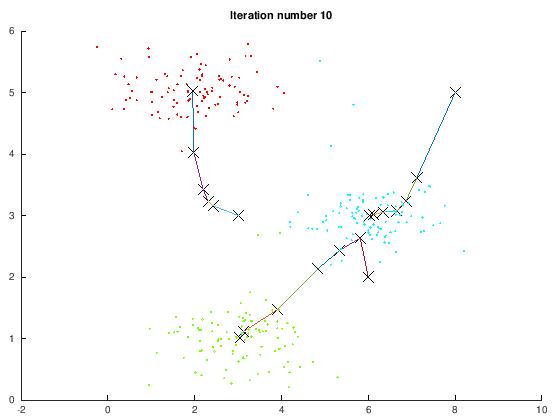

In [15]:
%% Running K-Means clustering on example dataset.
figure;
hold on;
centroids = initial_centroids;
previous_centroids = centroids;
idx = zeros(size(X, 1), 1);
% Run K-Means
for i = 1:max_iters   
	% For each example in X, assign it to the closest centroid
	idx = findClosestCentroids(X, centroids);
	% Optionally, plot progress here
	plotProgresskMeans(X, centroids, previous_centroids, idx, K, i);
	previous_centroids = centroids;
	% Given the memberships, compute new centroids
	centroids = computeCentroids(X, idx, K);
    fprintf(['K-Means iteration %d/%d\t','%s \n'], i, max_iters, mat2str(centroids, [5 5]));
end;
hold off;

**============= Part 4: K-Means Clustering on Pixels ===============**  
In this exercise, you will use K-Means to compress an image.  
To do this, you will first run K-Means on the colors of the pixels in the image and then you will map each pixel onto its closest centroid.

In [16]:
clear ; close all; clc % Initialization

In [17]:
%  Load an image of a bird
A = double(imread('bird_small.png'));
% If imread does not work for you, you can try instead
%   load ('bird_small.mat');

In [18]:
A = A / 255; % Divide by 255 so that all values are in the range 0 - 1

In [19]:
% Size of the image
img_size = size(A);

In [20]:
% Reshape the image into an Nx3 matrix where N = number of pixels.
% Each row will contain the Red, Green and Blue pixel values
% This gives us our dataset matrix X that we will use K-Means on.
X = reshape(A, img_size(1) * img_size(2), 3);

In [21]:
% Run your K-Means algorithm on this data
% You should try different values of K and max_iters here
K = 16; 
max_iters = 10;

In [22]:
% When using K-Means, it is important the initialize the centroids randomly. 
% You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K);

In [23]:
% Run K-Means
[centroids, idx] = runkMeans(X, initial_centroids, max_iters);

K-Means iteration 1/10	[0.59211 0.46857 0.37782;0.47917 0.43257 0.42315;0.27358 0.24257 0.22688;0.91983 0.87339 0.78717;0.12691 0.13336 0.12293;0.66998 0.48051 0.20054;0.94981 0.87116 0.58311;0.058665 0.064386 0.054401;0.3285 0.34088 0.40568;0.7524 0.60159 0.28742;0.45583 0.32179 0.17992;0.86748 0.56661 0.29569;0.9211 0.72958 0.41926;0.76198 0.66206 0.50941;0.080779 0.087299 0.076753;0.19539 0.19265 0.19241] 
K-Means iteration 2/10	[0.60279 0.48613 0.40635;0.47731 0.45672 0.48395;0.28494 0.24932 0.2362;0.92123 0.88603 0.80216;0.1273 0.1354 0.12586;0.65491 0.46946 0.19477;0.95323 0.85146 0.60647;0.060233 0.065912 0.056068;0.33086 0.34771 0.41999;0.74953 0.59794 0.31588;0.45847 0.33381 0.20341;0.90257 0.57233 0.27248;0.89349 0.71899 0.43622;0.73497 0.65759 0.55117;0.085457 0.092364 0.081782;0.19097 0.1881 0.18341] 
K-Means iteration 3/10	[0.60057 0.48677 0.41169;0.47214 0.47836 0.53834;0.29029 0.25305 0.23942;0.92887 0.89799 0.81043;0.12816 0.13646 0.12714;0.64911 0.46655 0.19638;0.95361

**================= Part 5: Image Compression ======================**

In [33]:
% Applying K-Means to compress an image.
% Essentially, now we have represented the image X as in terms of the indices in idx. 
% We can now recover the image from the indices (idx) by mapping each pixel
% (specified by its index in idx) to the centroid value
X_recovered = centroids(idx,:);

In [31]:
% Reshape the recovered image into proper dimensions
X_recovered = reshape(X_recovered, img_size(1), img_size(2), 3);

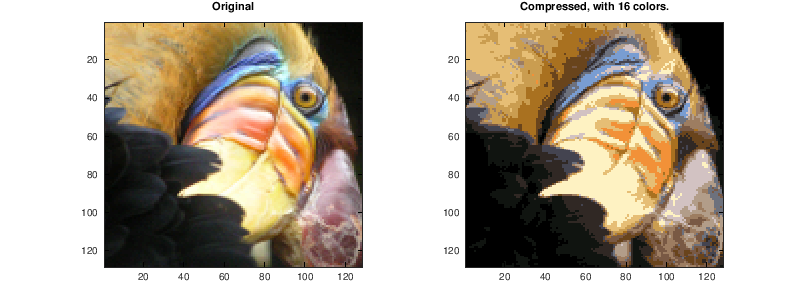

In [32]:
figure(1, 'position',[1,1,800,300]);
% Display the original image - 16/10
subplot(1, 2, 1);
imagesc(A); 
title('Original');

% Display compressed image side by side
subplot(1, 2, 2);
imagesc(X_recovered)
title(sprintf('Compressed, with %d colors.', K));

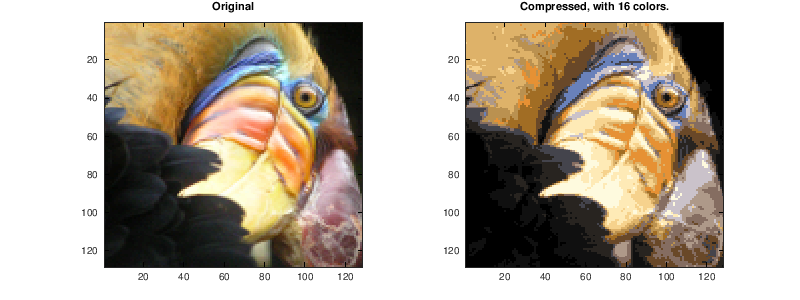

In [183]:
figure(1, 'position',[1,1,800,300]);
% Display the original image - 16/20
subplot(1, 2, 1);
imagesc(A); 
title('Original');

% Display compressed image side by side
subplot(1, 2, 2);
imagesc(X_recovered)
title(sprintf('Compressed, with %d colors.', K));

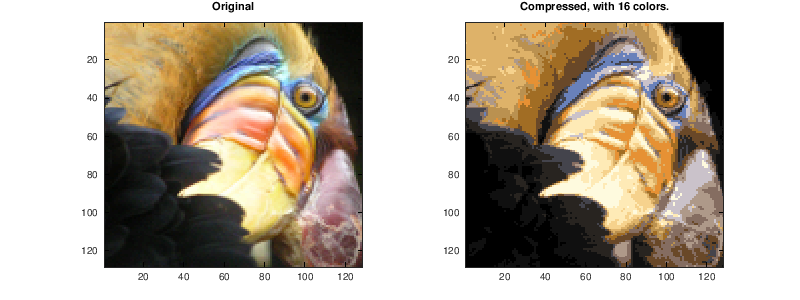

In [187]:
figure(1, 'position',[1,1,800,300]);
% Display the original image - 16/100
subplot(1, 2, 1);
imagesc(A); 
title('Original');

% Display compressed image side by side
subplot(1, 2, 2);
imagesc(X_recovered)
title(sprintf('Compressed, with %d colors.', K));

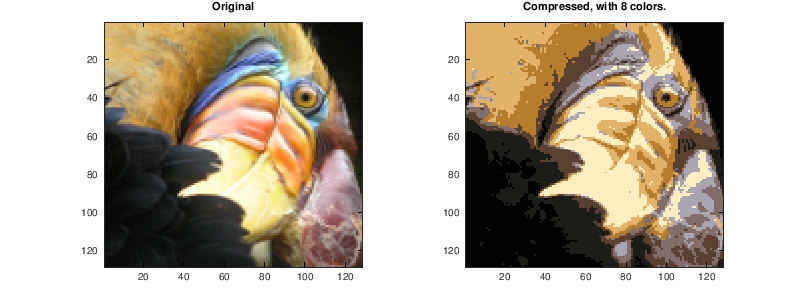

In [143]:
%figure(1, 'position',[startx,starty,width,height]);
figure(1, 'position',[1,1,800,300]);
% Display the original image - 8/10
subplot(1, 2, 1);
imagesc(A); 
title('Original');

% Display compressed image side by side
subplot(1, 2, 2);
imagesc(X_recovered*256)
title(sprintf('Compressed, with %d colors.', K));

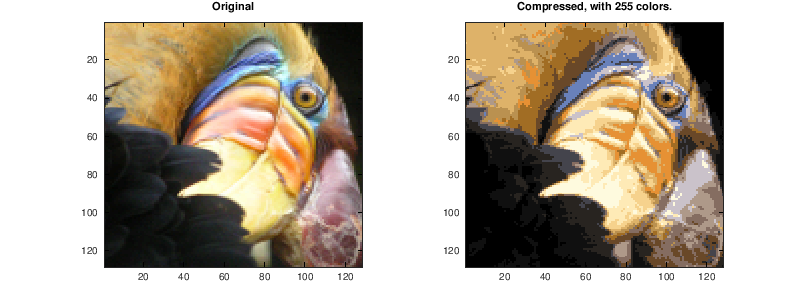

In [191]:
%figure(1, 'position',[startx,starty,width,height]);
figure(1, 'position',[1,1,800,300]);
% Display the original image - 255/10
subplot(1, 2, 1);
imagesc(A); 
title('Original');

% Display compressed image side by side
subplot(1, 2, 2);
imagesc(X_recovered*256)
title(sprintf('Compressed, with %d colors.', K));